# Measure concentration 

The averages of random variables are typically tightly concentrated around the expectation. There are several tools that give precise bounds, one of which is *Hoeffding's inequality*:

Let $\epsilon>0$, and let $X_1,\ldots, X_m$ be independent random variables with values in the interval $[a,b]$, s.t. all have the same expectation $\mathbb E[X_i]=\mu$.
Then 
$$
\mathbb P\left[\left|\tfrac{1}{m}\sum_{i=1}^m X_i -\mu\right|\geq \epsilon\right]\leq 2e^{-\frac{2m\epsilon^2}{(b-a)^2}}
$$

Let's see whether we can observe this measure concentration in practice.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num=5
M=[100+i*100 for i in range(num)]
repeats=1000

def show(rand_var,repeats=1000,M=M,xlim=None):
    fig,axs=plt.subplots(1,len(M),figsize=(len(M)*3,3),sharey=True)
    for ax,m in zip(axs,M):
        avgs=[np.mean(rand_var(m)) for _ in range(repeats)]
        if xlim is None:
            # set x-range to more or less 5 to 95 percentile
            five_perc=np.percentile(avgs,5)
            ninetyfive_perc=np.percentile(avgs,95)
            offset=(ninetyfive_perc-five_perc)*0.10
            xlim=(five_perc-offset,ninetyfive_perc+offset)
        ax.set_xlim(*xlim)
        ax.hist(avgs,edgecolor="white",bins=np.linspace(*xlim,25))
        ax.set_title("m={}".format(m))

## Uniform distribution

First, we try the uniform distribution. We first illustrate the distribution.

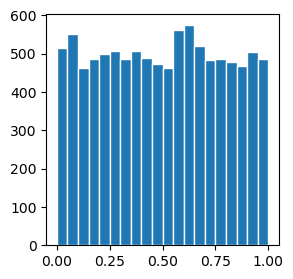

In [3]:
uniform=lambda m: np.random.random(size=m)

samples=uniform(10000)

fig,ax=plt.subplots(figsize=(3,3))
ax.hist(samples,bins=20,edgecolor="white")
pass

Look's uniform. Next, we draw many times $m=100$ many samples from the uniform distribution, compute the average and then plot a histrogram of the *averages*. We repeat the same process for averages of $m=200$ samples, $m=300$ samples and so on.

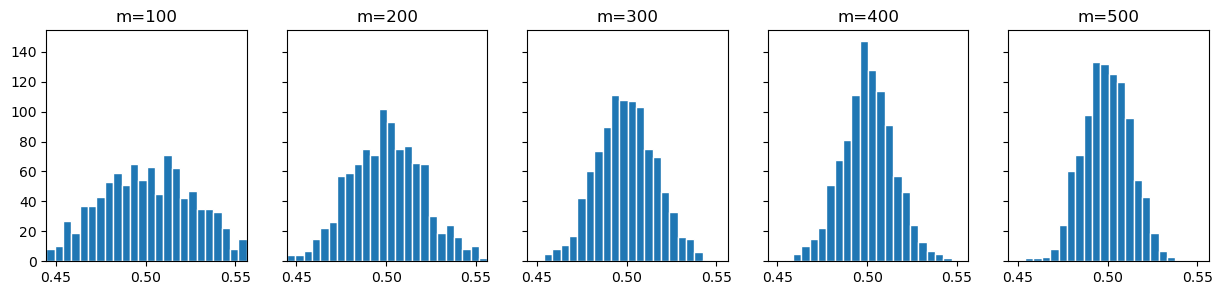

In [4]:
show(uniform)

As we can see, with increasing $m$, the histogram of the averages becomes more and more narrow, and the averages become more concentrated around the overall expectation 0.5.

## alpha distribution

Next, let's try out an [alpha distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.alpha.html). Because the distribution can take arbitrarily large values, we need to replace too large values with some upper bound. Here we simply clip at 2.

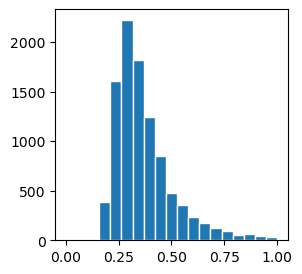

In [5]:
from scipy.stats import alpha

alpha_var=lambda m : np.clip(alpha.rvs(3, size=m),0,2)

samples=alpha_var(10000)

fig,ax=plt.subplots(figsize=(3,3))
ax.hist(samples,bins=np.linspace(0,1,20),edgecolor="white")
pass

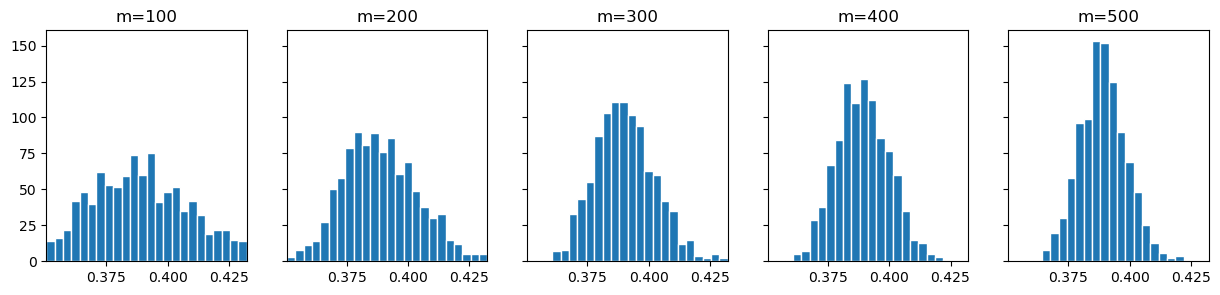

In [6]:
show(alpha_var)

This looks quite similar to what we had above for the uniform distribution.

## beta distribution

Next, let's investigate the [beta distribution.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html)

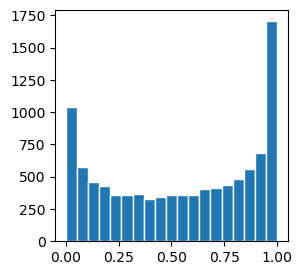

In [7]:
from scipy.stats import beta

beta_var=lambda m : beta.rvs(0.6,0.5, size=m)

samples=beta_var(10000)

fig,ax=plt.subplots(figsize=(3,3))
ax.hist(samples,bins=np.linspace(0,1,20),edgecolor="white")
pass

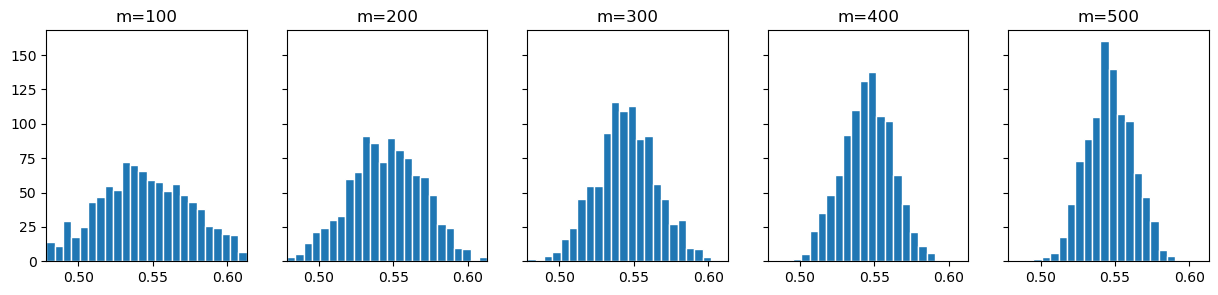

In [8]:
show(beta_var)

The beta distribution is quite different from the uniform distribution and also shares few similarities with the alpha distribution. The histograms of the averages, though, look very similar.

## Weibull distribution
Next, let's see what happens with a distribution, the [Weibull distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html), that does not satisfy the requirements of Hoeffding's inequality. Why is that? Because the values can become very large (and we don't clip). 

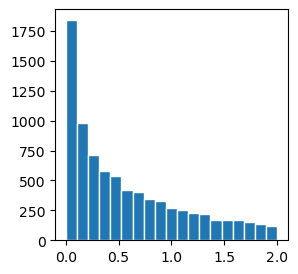

In [9]:
from scipy.stats import weibull_min

weibull_var=lambda m : weibull_min.rvs(0.7, size=m)

samples=weibull_var(10000)

fig,ax=plt.subplots(figsize=(3,3))
ax.hist(samples,bins=np.linspace(0,2,20),edgecolor="white")
pass

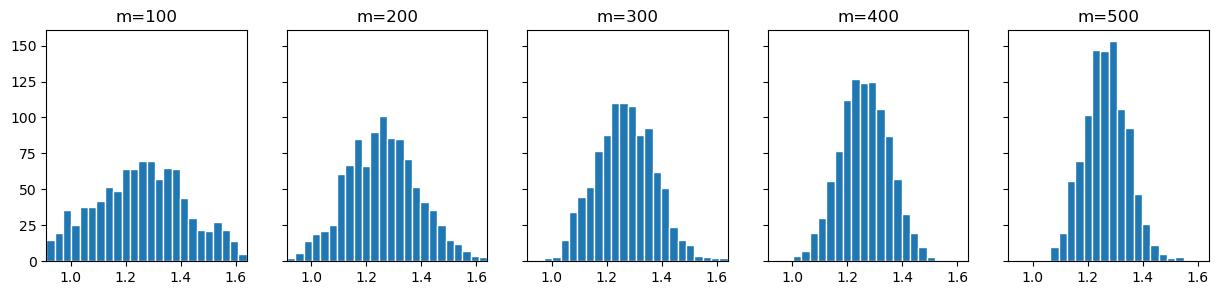

In [10]:
show(weibull_var)

Interestingly, this still looks the same. It's hard to say whether the concentration is slower or not.